In [51]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import linregress

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]
# })

# font = {
#     'style': 'normal',
# #     'family': 'computer modern',
#     'weight': 'bold',
#     'size': 22
# }

matplotlib.rc('font', **font)


In [2]:
L = 1e-1
C = 1e-7
R = 75

epsilon_o = 4

frequency_resonance_approx = 1600

frequency = np.arange(1100, 2150, 50)
voltage = np.array([544, 708, 820, 852, 820, 764, 700, 640, 588, 540,
                   492, 452, 416, 388, 356, 336, 316, 300, 276, 268, 252]) * 1e-3
frequency_cyclic = frequency * 2 * np.pi

data = pd.DataFrame(
    data=[frequency, voltage, frequency_cyclic],
)

data = data.T
data.columns = ['frequency', 'voltage', 'frequency_cyclic']


In [3]:
frequency_resonance_experimental = 0
for i in range(len(voltage)):
    if voltage[i] == max(voltage):
        frequency_resonance_experimental = frequency_cyclic[i]
        break


# 1.

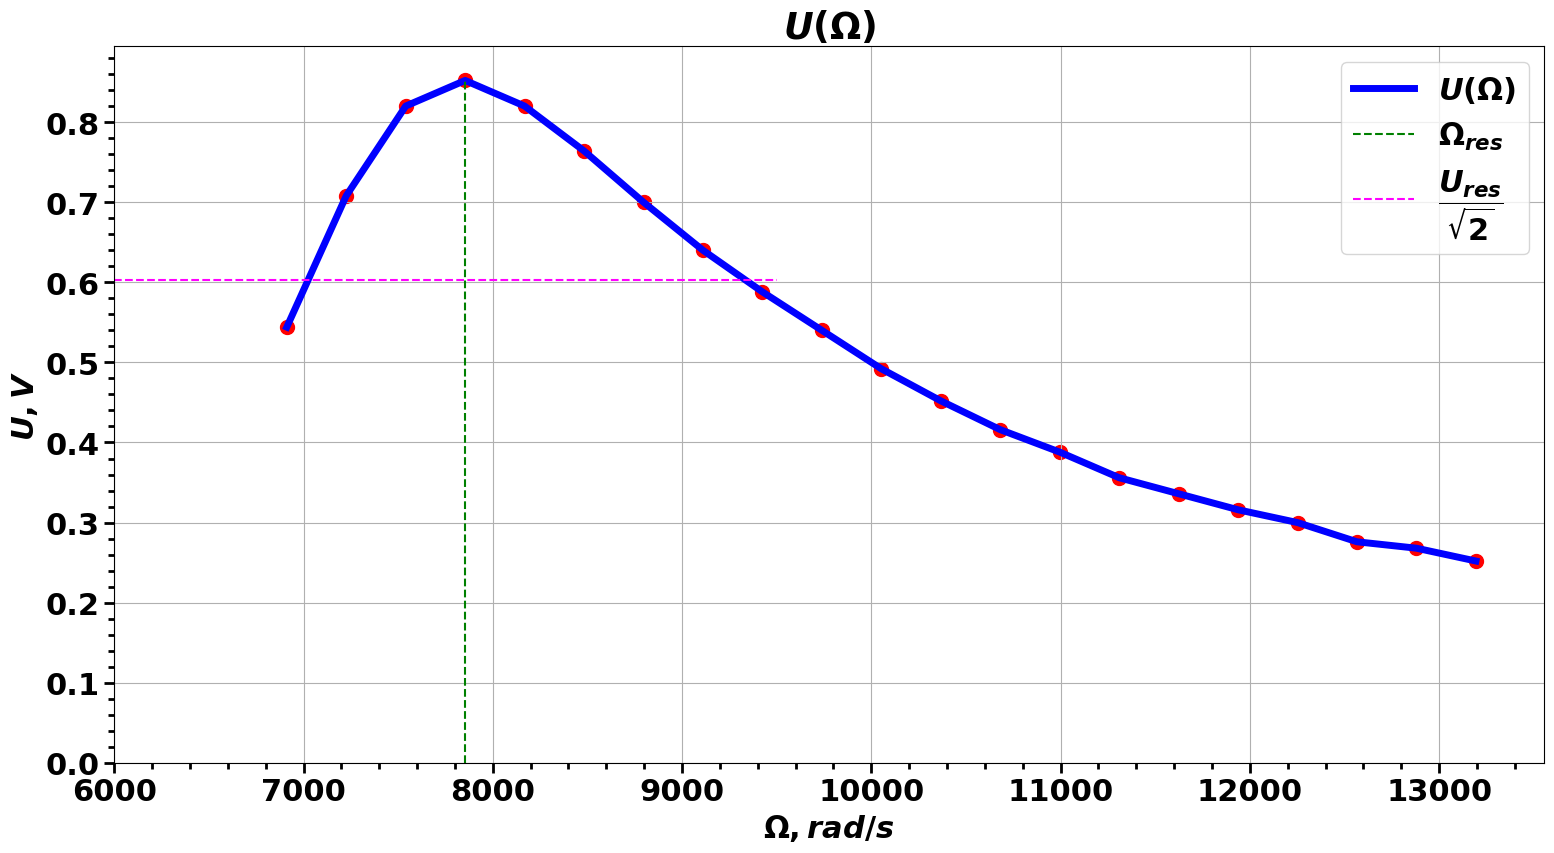

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(frequency_cyclic, voltage, linewidth=5, c='blue', label=r'$U(\Omega)$')
plt.scatter(frequency_cyclic, voltage, s=100, c='red')
plt.plot([frequency_resonance_experimental for value in voltage], np.linspace(0, max(voltage), len(voltage)),
         c='green',
         linestyle='--',
        label=r'$\Omega_{res}$')
plt.plot(np.linspace(6000, 9500, 9), [1/np.sqrt(2) * max(voltage) for i in voltage[:9]],
        linestyle='--',
        c='magenta',
        label=r'$\dfrac{U_{res}}{\sqrt{2}}$')
plt.title(r'$U(\Omega)$')
plt.ylabel(r'$U, V$')
plt.xlabel(r'$\Omega, rad/s$')

plt.ylim(0)
plt.xlim(6000)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/voltage(frequency).png')
plt.show()


In [29]:
frequency_resonance_approx * 2 * np.pi - frequency_cyclic[3]

2199.1148575128555

# 2

$ Q = \dfrac{\Omega_0}{\Delta\Omega}$, где $\Omega_0$ -  резонансная частота, $\Delta\Omega$

In [31]:
omega_0 = frequency_resonance_experimental
delta_omega = 9400 - 7000
Q = omega_0 / delta_omega
Q

3.272492347489368

# 3
$$
Q = \dfrac{U_{C_{res}}}{\varepsilon_{0}} = \dfrac{1}{R}\sqrt{\dfrac{L}{C}}
$$

In [37]:
# frequency_resonance_approx * 2 * np.pi / epsilon_o
(1 / R * np.sqrt(L/C)) / Q

4.074366543152521

# 4
$$ \Omega_{res}^2 = \dfrac{1}{LC} - \dfrac{R^2}{4L^2} $$

In [9]:
frequency_resonance = np.array(
    [12.34, 7.18, 4.12, 2.46, 1.24, 0.7]) * 1e3 * 2 * np.pi
capacity = np.array([1, 3, 10, 30, 100, 300]) * 1e-9

data = pd.DataFrame(data=[frequency_resonance, capacity, ])
data = data.T
data.columns = ['freuqency_resonance', 'capacity']

slope, intercept = linregress(1/capacity, frequency_resonance ** 2)[:2]


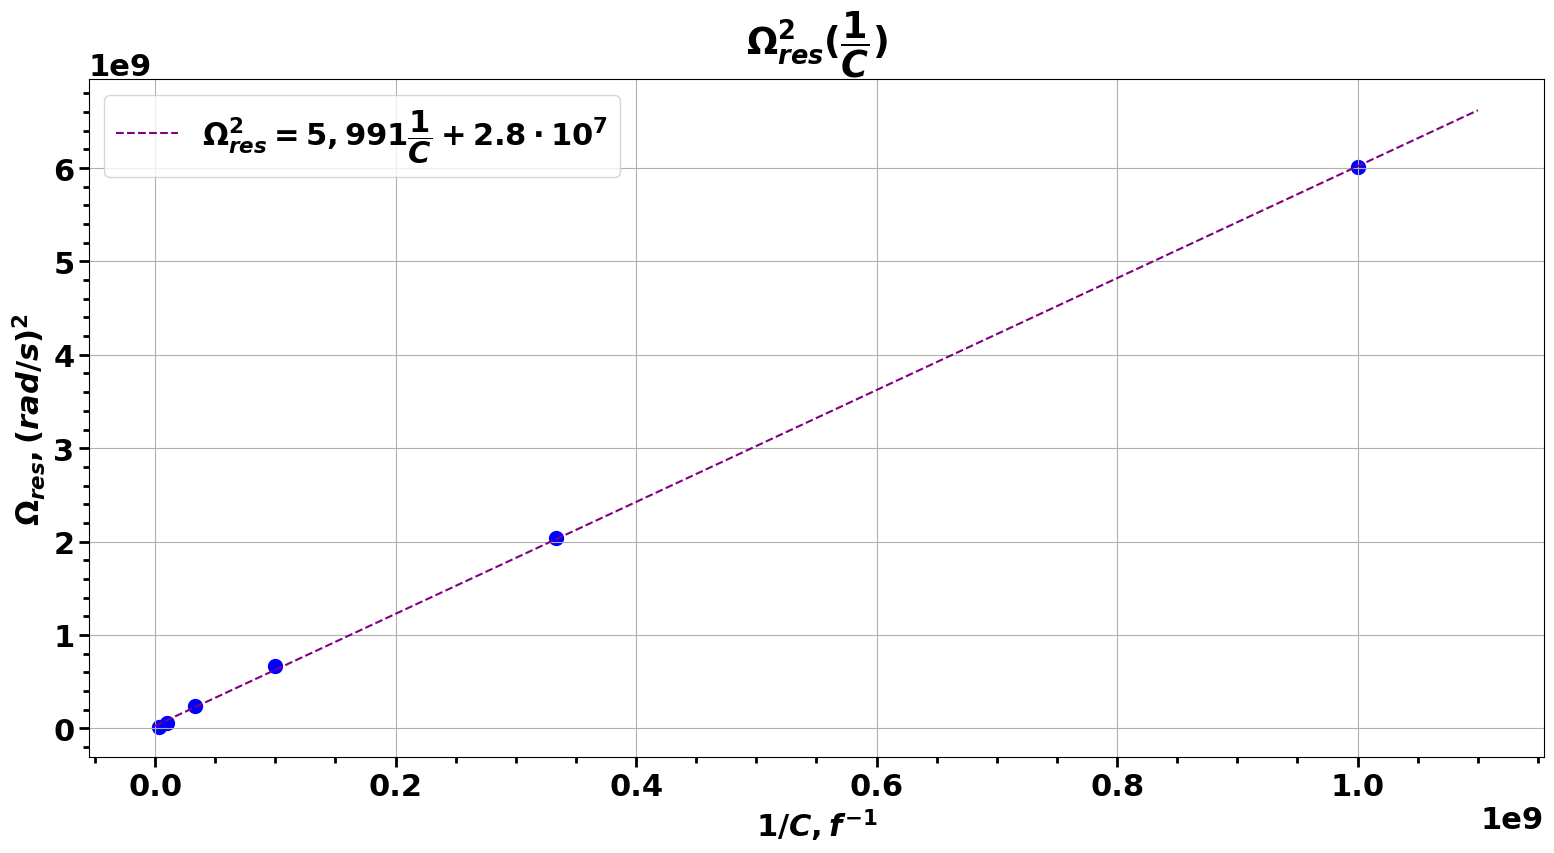

In [74]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.scatter(1 / capacity, frequency_resonance ** 2, s=100, c='blue')
x = np.linspace(0, max(1/capacity) * 1.1, 100)
plt.plot(x, slope * x + intercept, linestyle='--', c='purple', label=r'$\Omega_{res}^2 = 5,991\dfrac{1}{C} + 2.8 \cdot 10^7$')

plt.title(r'$\Omega_{res}^{2}(\dfrac{1}{C})$')
plt.xlabel(r'$1/C, f^{-1}$')
plt.ylabel(r'$\Omega_{res}, (rad/s)^2$')
plt.grid()

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
plt.legend()
plt.tight_layout()
plt.savefig('plots/omega_res(1c).png')
plt.show()


In [42]:
l_evaluated = 1 / slope
print(l_evaluated)
print(L)
print(np.abs(l_evaluated - L))

0.16691654122117552
0.1
0.06691654122117552


# 5

In [41]:
r_evaluated = np.sqrt(intercept * (l_evaluated ** 2) * 4)
r_evaluated

1772.654573833218